In [9]:
import numpy as np
from pandas import read_csv
import pandas as pd
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import Imputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
## Data Preparation
dat = read_csv("data/train.csv")
## With and without the -1, because it could be of significance.
count_nan = len(dat) - dat.count()
print("Number of NaNs", count_nan)
## There are no null values that need to be dealt with
## Make a different copy of the data to see if the -1s have a significance

Number of NaNs id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_ca

In [3]:
## Information about the data ##
## bin to indicate binary features
## cat to indicate categorical features
## without; either continuous or ordinal
X = dat.loc[:, dat.columns != "target"]
y = dat.loc[:, "target"]

print("Values of target", y.unique())
for i in X.columns:
    print(i, dat.loc[:, i].unique())
print("We can see that all the categorical columns are numbers. We can convert those")

Values of target [0 1]
id [      7       9      13 ..., 1488017 1488021 1488027]
ps_ind_01 [2 1 5 0 4 3 6 7]
ps_ind_02_cat [ 2  1  4  3 -1]
ps_ind_03 [ 5  7  9  2  0  4  3  1 11  6  8 10]
ps_ind_04_cat [ 1  0 -1]
ps_ind_05_cat [ 0  1  4  3  6  5 -1  2]
ps_ind_06_bin [0 1]
ps_ind_07_bin [1 0]
ps_ind_08_bin [0 1]
ps_ind_09_bin [0 1]
ps_ind_10_bin [0 1]
ps_ind_11_bin [0 1]
ps_ind_12_bin [0 1]
ps_ind_13_bin [0 1]
ps_ind_14 [0 1 2 3 4]
ps_ind_15 [11  3 12  8  9  6 13  4 10  5  7  2  0  1]
ps_ind_16_bin [0 1]
ps_ind_17_bin [1 0]
ps_ind_18_bin [0 1]
ps_reg_01 [ 0.7  0.8  0.   0.9  0.6  0.5  0.4  0.3  0.2  0.1]
ps_reg_02 [ 0.2  0.4  0.   0.6  1.8  0.1  0.7  1.4  0.9  0.3  0.5  0.8  1.   1.3  1.6
  1.5  1.2  1.1  1.7]
ps_reg_03 [ 0.71807033  0.76607767 -1.         ...,  1.60078106  1.63075903
  1.74355958]
ps_car_01_cat [10 11  7  6  9  5  4  8  3  0  2  1 -1]
ps_car_02_cat [ 1  0 -1]
ps_car_03_cat [-1  0  1]
ps_car_04_cat [0 1 8 9 2 6 3 7 4 5]
ps_car_05_cat [ 1 -1  0]
ps_car_06_cat [ 4 11 14 1

In [7]:
## Transforming the -1
X_no_neg = X
y_no_neg = y
cat = pd.DataFrame()
bn = pd.DataFrame()
norm = pd.DataFrame()
for i in X.columns:
    if "cat" in i:
        # Transform Median
        cat[i] = dat.loc[:, i]
    elif "bin" in i:
        # Transform
        bn[i] = dat.loc[:, i]
    else:
        # Do something
        norm[i] = dat.loc[:, i]

In [22]:
pipe = Pipeline([
       ("remove_neg_ones", Imputer(missing_values=-1, strategy="mean")),
        ("z-scaling", StandardScaler())
        ])
tmp = 0
for i in cat.columns:
    cat.loc[cat[i] == -1, i] = np.median(cat.loc[cat[i] != -1,i])
    tmp = tmp + sum(cat[i] == -1)
print("Number of -1 in data:", tmp)

tmp = 0
for i in bn.columns:
    tmp = tmp + sum(bn[i] == -1)
    print(i, ":", tmp)
print("There are no negatives in bin columns")

Number of -1 in data: 0
ps_ind_06_bin : 0
ps_ind_07_bin : 0
ps_ind_08_bin : 0
ps_ind_09_bin : 0
ps_ind_10_bin : 0
ps_ind_11_bin : 0
ps_ind_12_bin : 0
ps_ind_13_bin : 0
ps_ind_16_bin : 0
ps_ind_17_bin : 0
ps_ind_18_bin : 0
ps_calc_15_bin : 0
ps_calc_16_bin : 0
ps_calc_17_bin : 0
ps_calc_18_bin : 0
ps_calc_19_bin : 0
ps_calc_20_bin : 0
There are no negatives in bin columns


In [23]:
mx = 0
for i in norm.columns:
    tmp = 0
    tmp = tmp + sum(norm[i] == -1)
    print(i, ":", tmp)
    if mx < tmp:
        mx=tmp

print("~", mx/float(len(norm)) * 100, "% of the data is missing, so we are going to assume that there is significance that the data is missing")
num_missing_per_row = np.zeros(len(norm))
tmp = 0
for index, row in norm.iterrows():
    print(row)
    break
    num_missing_per_row[index] =  sum(row == -1)

id : 0
ps_ind_01 : 0
ps_ind_03 : 0
ps_ind_14 : 0
ps_ind_15 : 0
ps_reg_01 : 0
ps_reg_02 : 0
ps_reg_03 : 107772
ps_car_11 : 5
ps_car_12 : 1
ps_car_13 : 0
ps_car_14 : 42620
ps_car_15 : 0
ps_calc_01 : 0
ps_calc_02 : 0
ps_calc_03 : 0
ps_calc_04 : 0
ps_calc_05 : 0
ps_calc_06 : 0
ps_calc_07 : 0
ps_calc_08 : 0
ps_calc_09 : 0
ps_calc_10 : 0
ps_calc_11 : 0
ps_calc_12 : 0
ps_calc_13 : 0
ps_calc_14 : 0
~ 18.1064897885 % of the data is missing, so we are going to assume that there is significance that the data is missing
id             7.000000
ps_ind_01      2.000000
ps_ind_03      5.000000
ps_ind_14      0.000000
ps_ind_15     11.000000
ps_reg_01      0.700000
ps_reg_02      0.200000
ps_reg_03      0.718070
ps_car_11      2.000000
ps_car_12      0.400000
ps_car_13      0.883679
ps_car_14      0.370810
ps_car_15      3.605551
ps_calc_01     0.600000
ps_calc_02     0.500000
ps_calc_03     0.200000
ps_calc_04     3.000000
ps_calc_05     1.000000
ps_calc_06    10.000000
ps_calc_07     1.000000
ps_cal

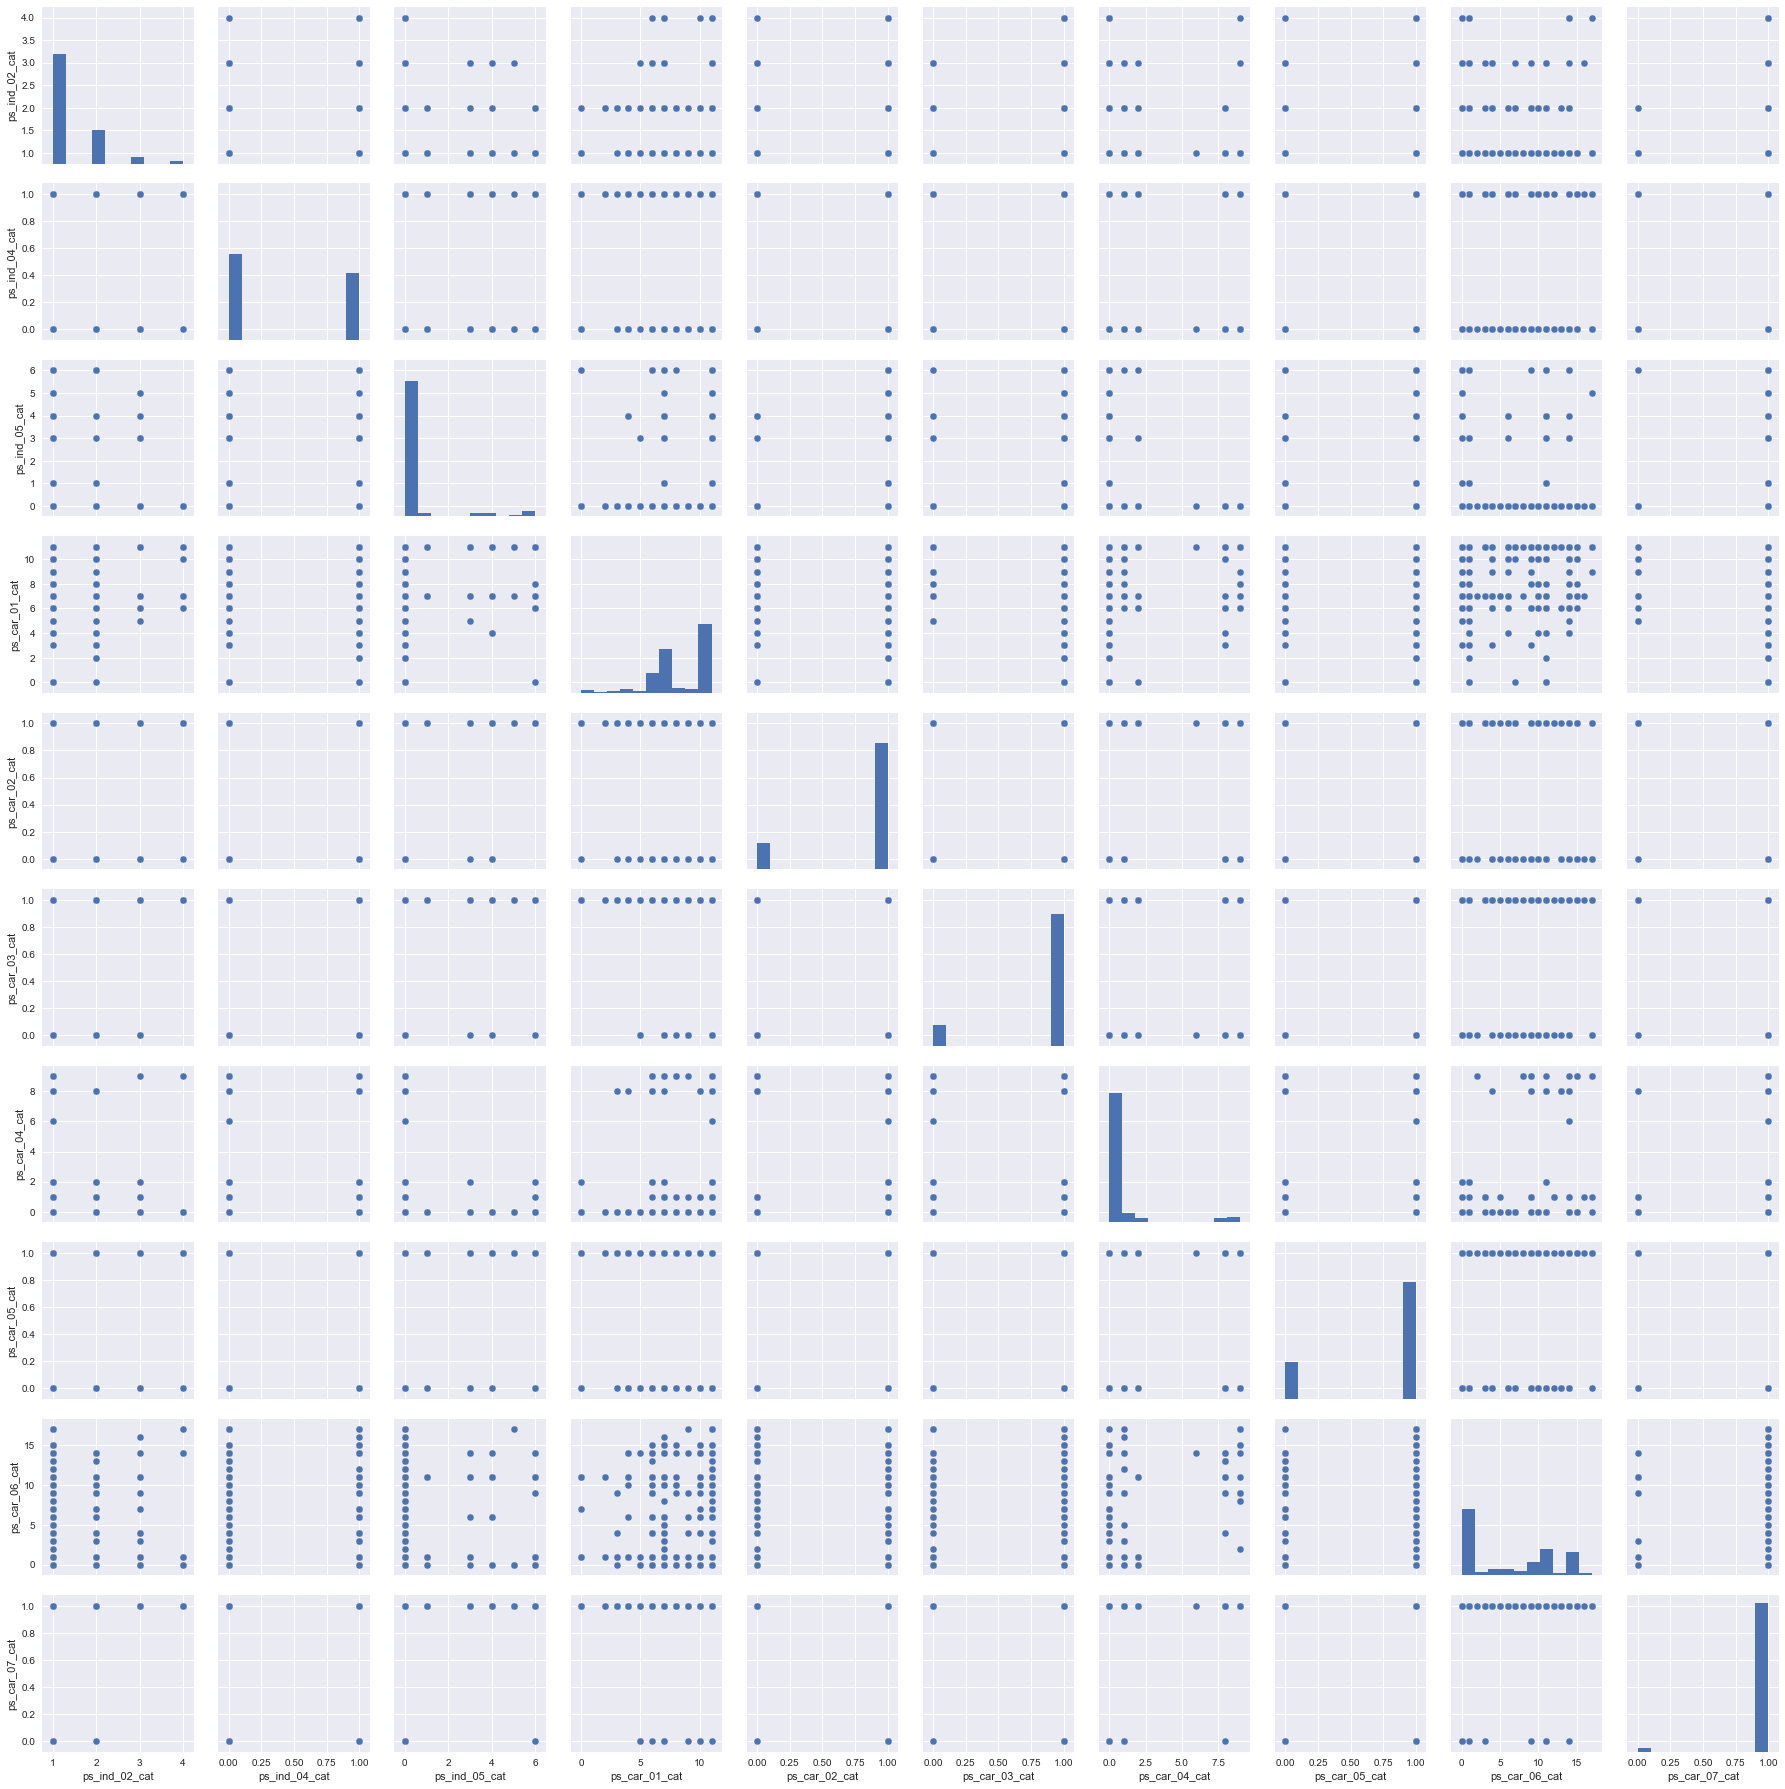

In [43]:
%matplotlib inline
## Data Exploration

sns.pairplot(norm[norm.columns[:10]][:500])



In [ ]:
## ps_car_13 vs ps_car_15
## ps_calc_4 distribution

In [ ]:
## Machine Learning
#from sklearn.neural_network import MLPClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


scale = StandardScaler()
scaled_X = scale.fit_transform(norm)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y)

clf = GradientBoostingClassifier(n_estimators=50, max_depth=3)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
confusion_matrix(y_test, predicted)

##